In [4]:
import numpy as np
import torch
import torch.nn as nn

npfile = np.load("./src/data/data-airfoils.npz")

In [20]:
print(npfile.keys())

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f5549a9e8b0>)


In [28]:
x = npfile["inputs"]
y = npfile['targets']

vx = npfile["vinputs"]
vy = npfile["vtargets"]

print("x : ", x.shape)
print("y : ", y.shape)
print("vx : ", vx.shape)
print("vy : ", vy.shape)

x :  (320, 3, 128, 128)
y :  (320, 3, 128, 128)
vx :  (80, 3, 128, 128)
vy :  (80, 3, 128, 128)


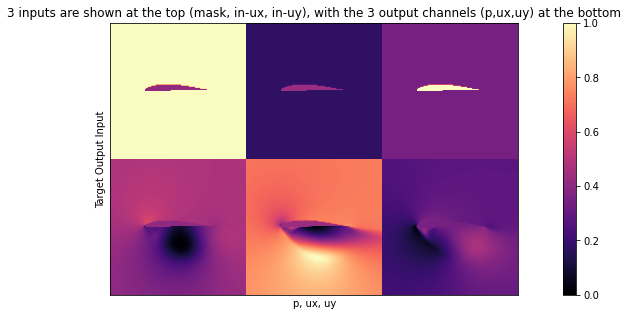

In [27]:
from src.utils.visualization import showSbs


NUM = 72
showSbs(x[NUM], y[NUM], stats = False, bottom = "Target Output", top = "Input", title="3 inputs are shown at the top (mask, in-ux, in-uy), with the 3 output channels (p,ux,uy) at the bottom"
)

In [29]:
from src.utils.datasets import DfpDataset
from torch.utils.data import DataLoader

tdata = DfpDataset(x,y)
vdata = DfpDataset(vx,vy)

BATCH_SIZE = 32

train_loader = DataLoader(tdata, batch_size = BATCH_SIZE, shuffle = True, drop_last = True)
valid_loader = DataLoader(vdata, batch_size = BATCH_SIZE, shuffle = True, drop_last = True)

print("train loader # : ", len(train_loader))
print("valid loader # : ", len(valid_loader))

train loader # :  10
valid loader # :  2
